## Classification Models

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

plt.style.use('classic')

In [2]:
# load the previously created data set for the ST4000DM000, where columns with all null values 
# or columns with a std of 0 have been removed and the countdown column has already been created
classification_data = pd.read_csv('../data/special_purpose/ST4000DM000_processed_relevant.csv')

In [3]:
# create a new column based on the countdown which will be adjusted to serve a 
# classification purpose of "will fail within 30 days" or "will not fail within 30 days"
classification_data['fail_30'] = classification_data['countdown']

In [4]:
# function to adjust the previously created "fail_30" column and transform the data into a binary classification problem (e.g "will fail within 30 days" or "will not fail within 30 days"")
def classification_target(cols):
    """function to adjust the previously created "fail_30" column and transform data based on the previous data into 0 or 1
    if value is <= 30, the value is transformed into 1
    if value is > 30, the value is transformed into 0

    Args:
        cols: takes as an argument the panads column specified before the apply method

    Returns:
        int: 0 or 1 based on the previous information
    """
    classification = cols[0]

    if classification <= 30:
        return 1
    if classification > 30:
        return 0

# apply the created function using the .appy method
classification_data['fail_30'] = classification_data[['countdown']].apply(classification_target, axis=1)

In [5]:
# create a list of all column names only containing the smart features
columns = []

for col in classification_data.columns:
    if 'smart' in col:
        columns.append(col)

In [6]:
# split the data into features and target
X = classification_data[columns]
y = classification_data.fail_30

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

## DecisionTreeClassifier

In [8]:
tree_check = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
tree_check.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

Scores:
-------------------------
ROC-AUC : 0.9112
Accuracy : 0.9774
Recall   : 0.8332
Precision: 0.8642


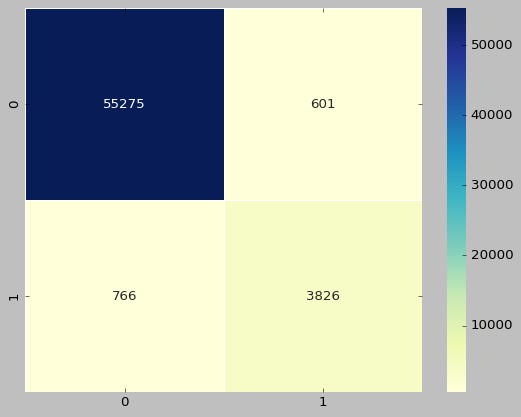

In [9]:
y_test_pred = tree_check.predict(X_test)

print('Scores:')
print('-------------------------')
print("ROC-AUC : {:.4f}".format(roc_auc_score(y_test, y_test_pred)))
print("Accuracy : {:.4f}".format(accuracy_score(y_test, y_test_pred)))
print("Recall   : {:.4f}".format(recall_score(y_test, y_test_pred)))
print("Precision: {:.4f}".format(precision_score(y_test, y_test_pred)))

confusion_matrix(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

## RandomForestClassifier

Scores:
-------------------------
ROC-AUC : 0.9806
Accuracy : 0.9962
Recall   : 0.9621
Precision: 0.9875


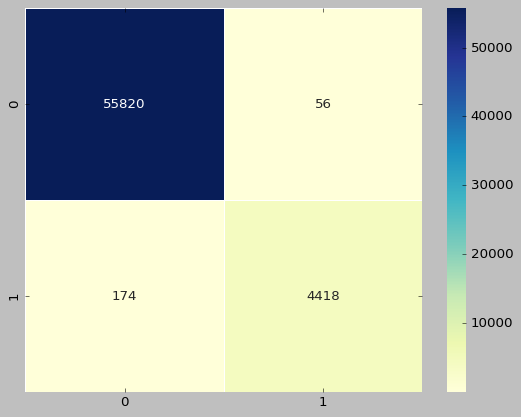

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

y_test_pred = forest.predict(X_test)

print('Scores:')
print('-------------------------')
print("ROC-AUC : {:.4f}".format(roc_auc_score(y_test, y_test_pred)))
print("Accuracy : {:.4f}".format(accuracy_score(y_test, y_test_pred)))
print("Recall   : {:.4f}".format(recall_score(y_test, y_test_pred)))
print("Precision: {:.4f}".format(precision_score(y_test, y_test_pred)))

confusion_matrix(y_test, y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

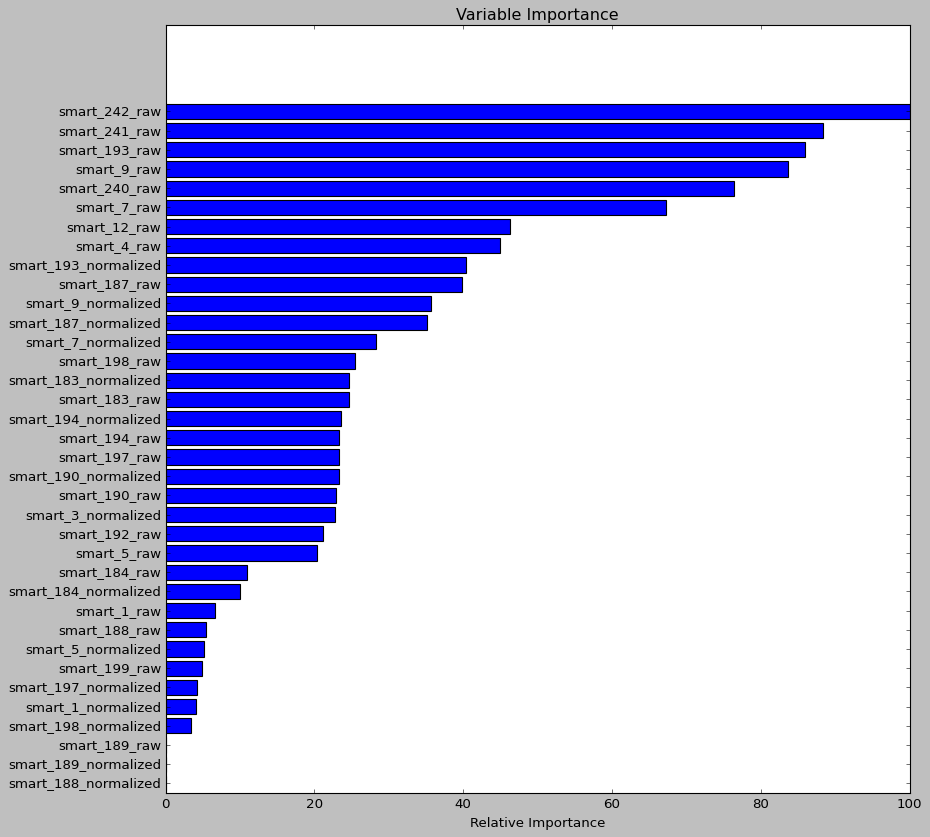

In [11]:
# Plot feature importance
feature_importance = forest.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12,12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()